In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
df = pd.read_csv("Data/NIFTY-BANK-14-09-2022-to-14-09-2023.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,14-SEP-2022,40308.80,41626.90,40288.90,41405.4,218413793.0,8227.00
1,15-SEP-2022,41533.70,41840.15,41153.50,41209.2,245307055.0,6772.31
2,16-SEP-2022,40977.20,41162.50,40502.05,40776.8,244187210.0,8926.40
3,19-SEP-2022,40685.60,41184.25,40509.90,40904.4,206028623.0,5828.98
4,20-SEP-2022,41304.15,41677.65,41207.30,41468.3,175202873.0,5080.23


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    247 non-null    float64
 6   Turnover (₹ Cr)  247 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [5]:
type(df['Date '].str.split('-')[1])

list

In [16]:
df = df.dropna()
trainData = df.iloc[:,4:5].values

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df

In [17]:
sc = MinMaxScaler(feature_range=(0,1))
train_Data = sc.fit_transform(trainData)
train_Data.shape

(247, 1)

In [18]:
X_train = []
y_train = []
for i in range (60,247):
    X_train.append(train_Data[i-60:i,0])
    y_train.append(train_Data[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [20]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(187, 60, 1)

In [22]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size=32, verbose=2)

Epoch 1/20
6/6 - 7s - loss: 0.2431 - 7s/epoch - 1s/step
Epoch 2/20
6/6 - 1s - loss: 0.1119 - 950ms/epoch - 158ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0886 - 943ms/epoch - 157ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0765 - 956ms/epoch - 159ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0686 - 928ms/epoch - 155ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0642 - 919ms/epoch - 153ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0622 - 891ms/epoch - 148ms/step
Epoch 8/20
6/6 - 1s - loss: 0.0599 - 880ms/epoch - 147ms/step
Epoch 9/20
6/6 - 1s - loss: 0.0601 - 890ms/epoch - 148ms/step
Epoch 10/20
6/6 - 1s - loss: 0.0572 - 909ms/epoch - 152ms/step
Epoch 11/20
6/6 - 1s - loss: 0.0556 - 886ms/epoch - 148ms/step
Epoch 12/20
6/6 - 1s - loss: 0.0548 - 896ms/epoch - 149ms/step
Epoch 13/20
6/6 - 1s - loss: 0.0539 - 925ms/epoch - 154ms/step
Epoch 14/20
6/6 - 1s - loss: 0.0542 - 883ms/epoch - 147ms/step
Epoch 15/20
6/6 - 1s - loss: 0.0541 - 894ms/epoch - 149ms/step
Epoch 16/20
6/6 - 1s - loss: 0.0536 - 895ms/epoch - 149ms/step
Epoch 1

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

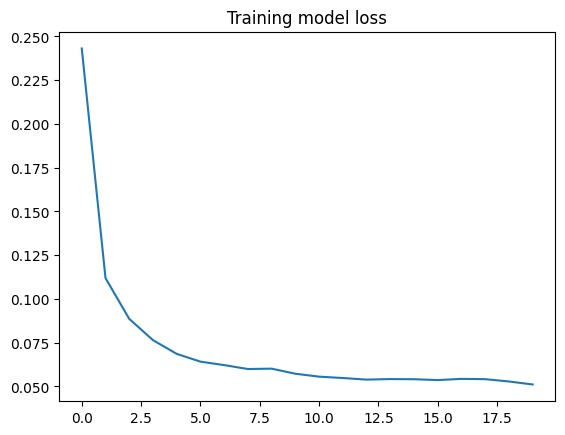

In [27]:
plt.plot(hist.history['loss'])
plt.title("Training model loss")
plt.ylable('loss')
plt.xlable('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [28]:
testdf = pd.read_csv("Data/NIFTY-BANK-14-09-2022-to-14-09-2023.csv")
testdf = testdf.dropna()
testdf = testdf.iloc[:,4:5]
y_testdf = testdf.iloc[60:,0:].values

inputClosing = testdf.iloc[:,0:].values
inputclosing_scaled = sc.transform(inputClosing)
inputclosing_scaled.shape
X_test = []
length = len(testdf)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputclosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(187, 60, 1)

In [29]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 46ms/step


array([[[0.16304654],
        [0.28616703],
        [0.39610276],
        ...,
        [0.58444834],
        [0.584481  ],
        [0.58472925]],

       [[0.16296178],
        [0.28577456],
        [0.39538646],
        ...,
        [0.5844798 ],
        [0.5847285 ],
        [0.58522654]],

       [[0.1627748 ],
        [0.28535184],
        [0.39501977],
        ...,
        [0.5847273 ],
        [0.58522576],
        [0.58594775]],

       ...,

       [[0.16415659],
        [0.28987932],
        [0.40374452],
        ...,
        [0.5927515 ],
        [0.5923145 ],
        [0.5921117 ]],

       [[0.1639235 ],
        [0.28949127],
        [0.40324748],
        ...,
        [0.5923127 ],
        [0.5921103 ],
        [0.59228384]],

       [[0.16413528],
        [0.28990206],
        [0.40378848],
        ...,
        [0.5921086 ],
        [0.59228265],
        [0.5927897 ]]], dtype=float32)

In [30]:
predicted_price = sc.inverse_transform(y_pred)

ValueError: Found array with dim 3. None expected <= 2.